# Rhys

## Research question/interests

I find gun violence quite an interesting topic to analyze, with the data we now have I feel like I can answer many questions I have had for the last few years. I feel as though I have been hearing about mass shootings in the news more frequently in the last few years. This makes me wonder and ask the question, has the number of mass shootings been increasing in the last couple years even including the pandemic and other important world events?

I am also quite interested to analyze on average how many people are injured or killed per each shooting incident and what does it take to for a shooting to be considered a mass shooting? I feel like I hear the word "mass shooting" thrown around quite a lot without yet I still have not heard a proper definition of the word.

I am interested in looking at the geographical factor of shootings. Within our data, we are given the cities and states in which the shootings occur. This gives me an idea to possibly create a heatmap and analyzing the different cities in which the shootings occur and what may be the worst state or city to live in based purely on gun violence statistics.

### Task 1 - EDA

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

# Import the data file
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

print(df.head())

   incident_id incident_date       state  city_or_county  \
0      2015849   May 26 2021    Illinois         Chicago   
1      2015730   May 26 2021  California        San Jose   
2      2014343   May 24 2021    Michigan         Inkster   
3      2014381   May 24 2021        Ohio  West Jefferson   
4      2012971   May 23 2021    Illinois         Chicago   

                         address  killed  injured  
0  7200 block of S Princeton Ave       0        4  
1              101 W Younger Ave      10        0  
2     27000 block of Rosewood St       2        2  
3                 127 Jackson St       4        0  
4                 3344 W Ohio St       0        4  


#### The number of columns our data intially had

In [ ]:
df.columns


Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'address',
       'killed', 'injured'],
      dtype='object')

#### Unique entries in our data set

In [ ]:
df.nunique(axis=0)

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

#### Below is the code to output the average number of shootings that occured each day.

In [ ]:
a = len(df)
b = date(2014,1,1)
c = date(2021,5,26)
d = c-b
delta = d.days
# Size of our data, or number of columns
# Divided by the number days from the start to the end of our data
print("Average number of shootings per day:",round(a/delta,2))

Average number of shootings per day: 1.08


In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,incident_id,killed,injured
count,2930.000000,2930.000000,2930.000000
mean,1099381.767918,1.072696,4.188055
std,587470.802438,2.156834,8.395836
min,92194.000000,0.000000,0.000000
25%,575898.750000,0.000000,3.000000
50%,1143329.500000,1.000000,4.000000
75%,1678961.750000,1.000000,5.000000
max,2015849.000000,59.000000,441.000000


#### Below is a graph showing the frequecy of people injured per incident analyzed

<AxesSubplot:title={'center':'Frequency of injured per incident'}, ylabel='Frequency'>

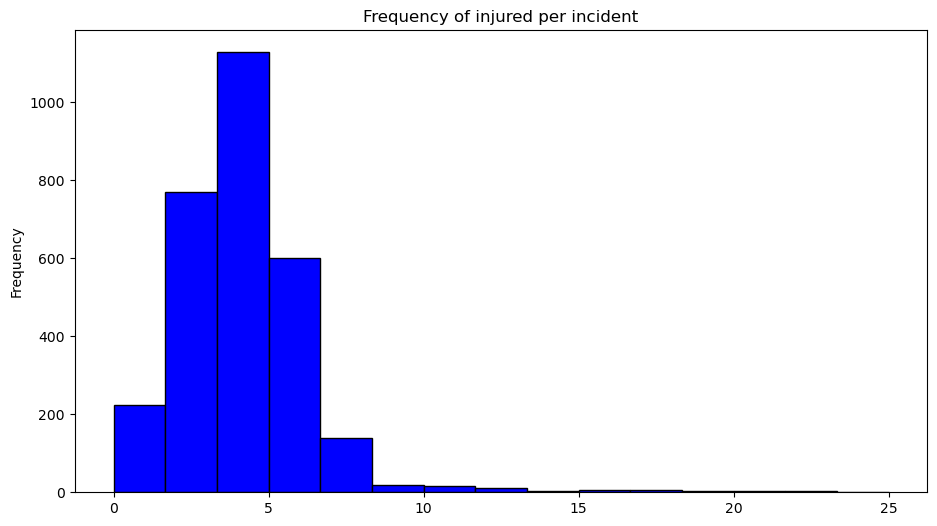

In [ ]:
# The below code just filters out most extreme instances
df = df[df['killed'] < 35]
df = df[df['injured'] < 35]
df['injured'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='blue',edgecolor='black',title = "Frequency of injured per incident")

#### The graph below shows the frequency of how many people were killed per incident analzyed.

<AxesSubplot:title={'center':'Frequency of killed per incident'}, ylabel='Frequency'>

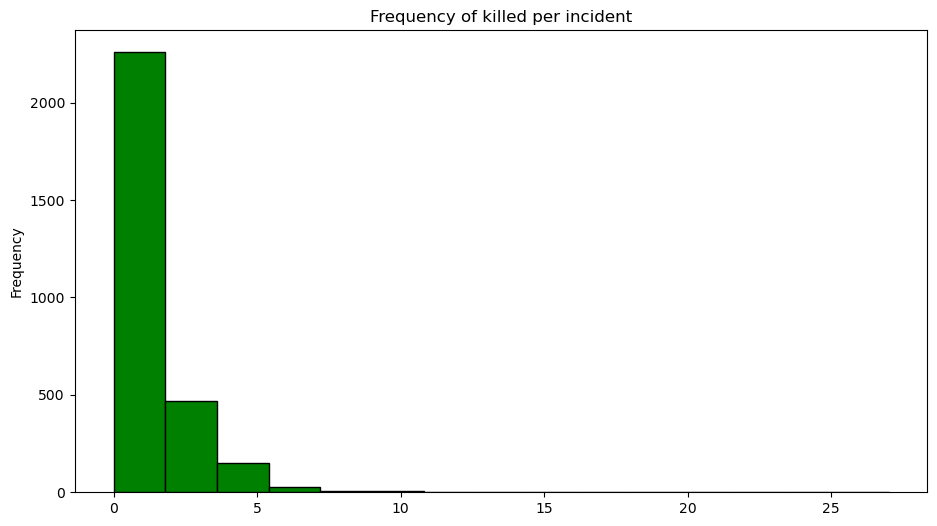

In [ ]:

df['killed'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='green',edgecolor='black',title = "Frequency of killed per incident")

#### Below we can see the number of shootings that occured in each state

<AxesSubplot:title={'center':'Number of shootings in each state'}>

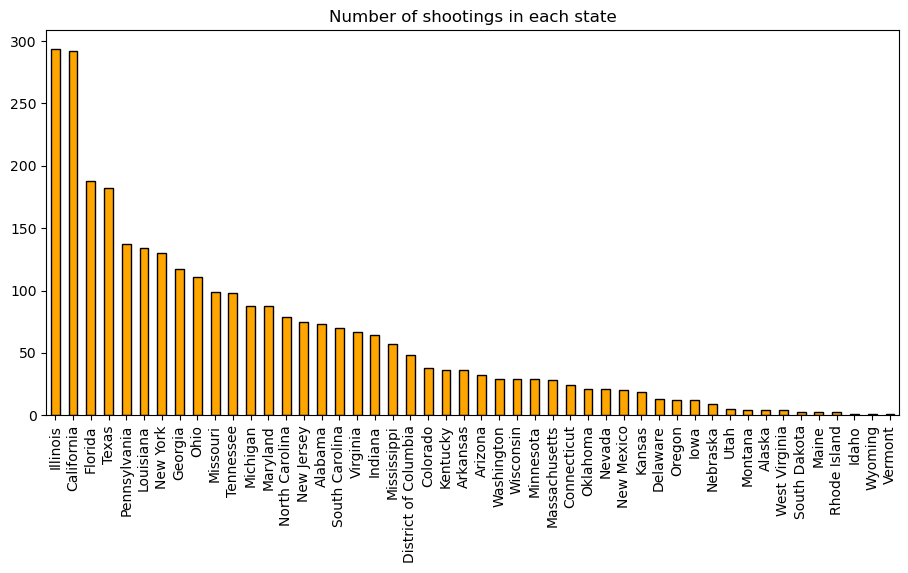

In [ ]:
df['state'].value_counts().plot(kind='bar',title = 'Number of shootings in each state', figsize=(11,5), facecolor = 'orange', edgecolor = 'black')


### <b>Task 2 - Analysis Pipeline </b>

##### Load Data - Already done

##### Clean Data - Below, I clean and filter our data so it is more usable for analyzing

In [ ]:
# Filter out the uneeded columns
df_cleaned = df.copy().drop(['incident_id','address'], axis=1)
df_cleaned = df_cleaned.dropna(axis=0)

# Renames our columns to look more freindly and useable
df_cleaned = df_cleaned.rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})

# Filters out any extreme casualties or injuries in shootings
df_cleaned = df_cleaned[df_cleaned['Killed'] < 15]
df_cleaned = df_cleaned[df_cleaned['Injured'] < 20]

print(df_cleaned.head())

  incident_date       State     City/County  Killed  Injured
0   May 26 2021    Illinois         Chicago       0        4
1   May 26 2021  California        San Jose      10        0
2   May 24 2021    Michigan         Inkster       2        2
3   May 24 2021        Ohio  West Jefferson       4        0
4   May 23 2021    Illinois         Chicago       0        4


#### Process Data - Below, I created a total row and changed the dates into years and months

In [ ]:
def clean_month(row):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]

def clean_year(row):
    years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])

# Creates a total row, combining killed and injured 
df_cleaned['Total'] = df_cleaned['Killed'] + df_cleaned['Injured']

df_cleaned['Month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
df_cleaned['Year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
   
# Filters out what is not a full year

df_cleaned = df_cleaned[df_cleaned['Year'] < 2021]

# Rearrange the new rows in my dataframe
df_cleaned = df_cleaned[['Year', 'Month', 'State','City/County', 'Killed', 'Injured', 'Total']]
print(df_cleaned.columns)
df_cleaned.to_csv('../data/processed/cleaned_gunviolence_rhys.csv')

Index(['Year', 'Month', 'State', 'City/County', 'Killed', 'Injured', 'Total'], dtype='object')


##### Wrangle Data - In the above cleaning process, I created a new total row summing those injured and killed in shootings. Other than this I did not need to wrangle the data very much.

#### Below is a graph outlining the average number of people killed and injured per incident

<AxesSubplot:>

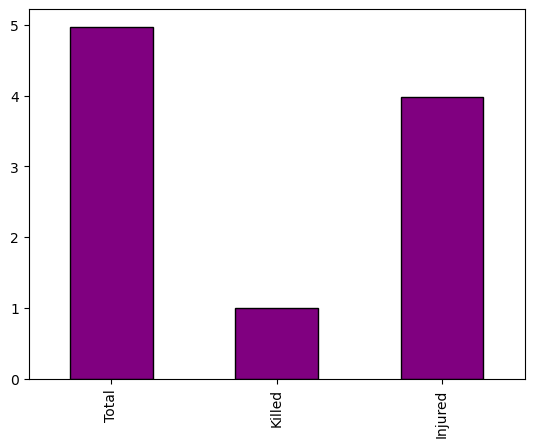

In [ ]:
df_tot = df_cleaned.copy()
df_tot = pd.DataFrame(df_tot, columns=["Total","Killed","Injured"])
df_tot.mean().plot(kind='bar', facecolor = 'purple', edgecolor = 'black')

#### Below is a graph showing the number of shooting incidents seperated into years.

<AxesSubplot:title={'center':'Number of Incidents per Year'}, xlabel='Year'>

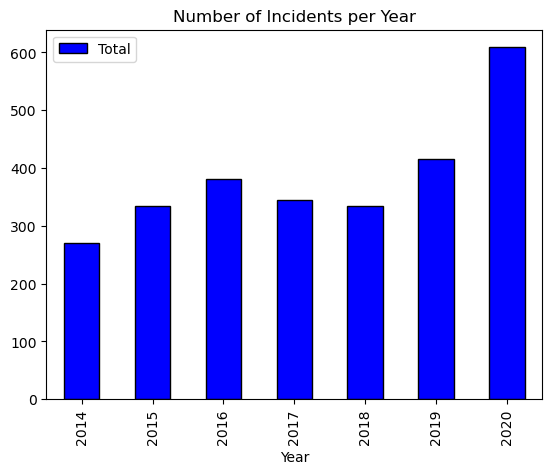

In [ ]:
df_year = df_cleaned.groupby('Year').count()
df_year = df_year.drop('Month', axis=1)
df_year = df_year.drop('State', axis=1)
df_year = df_year.drop('City/County', axis=1)
df_year = df_year.drop('Killed', axis=1)
df_year = df_year.drop('Injured', axis=1)

df_year.plot(kind = 'bar', title = 'Number of Incidents per Year', facecolor = 'blue', edgecolor = 'black')

#### Below is a graph showing the number of incidents seperated into months.

<AxesSubplot:title={'center':'Number of Incidents per Month'}, xlabel='Month'>

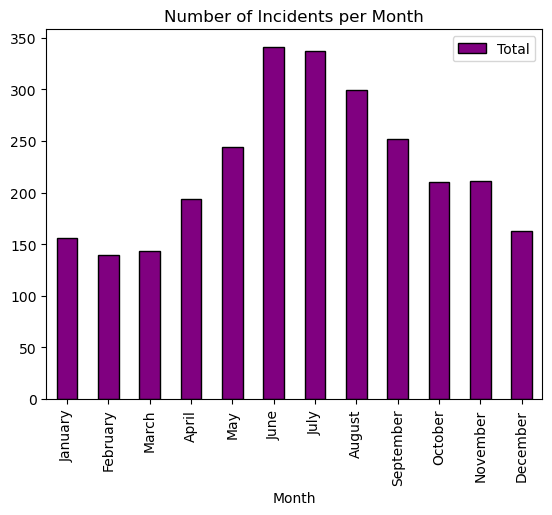

In [ ]:
df_month = df_cleaned.groupby('Month').count()
df_month = df_month.drop('Year', axis=1)
df_month = df_month.drop('State', axis=1)
df_month = df_month.drop('City/County', axis=1)
df_month = df_month.drop('Killed', axis=1)
df_month = df_month.drop('Injured', axis=1)
df_month = df_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
df_month.plot(kind = 'bar', title = 'Number of Incidents per Month', facecolor = 'purple', edgecolor = 'black')

#### Below is a standard, mean, max and min of our dataset after it was filtered and cleaned. 
* As you can see on average 1 person was killed and 4 were injured per incident anaylzed.

In [ ]:
df_total = df_cleaned.copy()
df_total = df_total.drop('Year', axis=1)
df_total.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Killed,Injured,Total
count,2689.000000,2689.000000,2689.000000
mean,0.995165,3.976199,4.971365
std,1.429251,1.958315,1.872697
min,0.000000,0.000000,4.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,13.000000,19.000000,27.000000


#### Below is a bar graph of how many were killed in each state

<AxesSubplot:title={'center':'Number killed in each state'}, xlabel='State'>

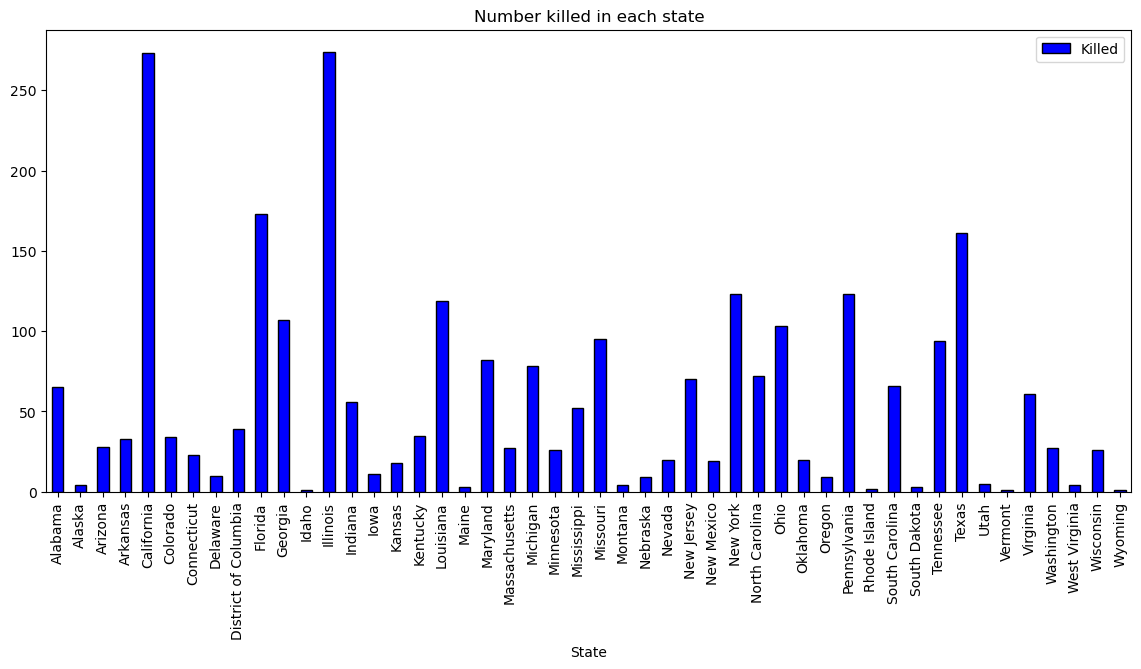

In [ ]:
killed_df = df_cleaned.groupby('State',as_index=False).agg({'Killed': 'count'})
killed_df.plot(kind = 'bar',figsize=(14,6), x = 'State', y = 'Killed', rot = 90, title = 'Number killed in each state', facecolor = 'blue', edgecolor = 'black')

#### Below is a bar graph of the number of people injured in each state.

<AxesSubplot:title={'center':'Number injured in each state'}, xlabel='State'>

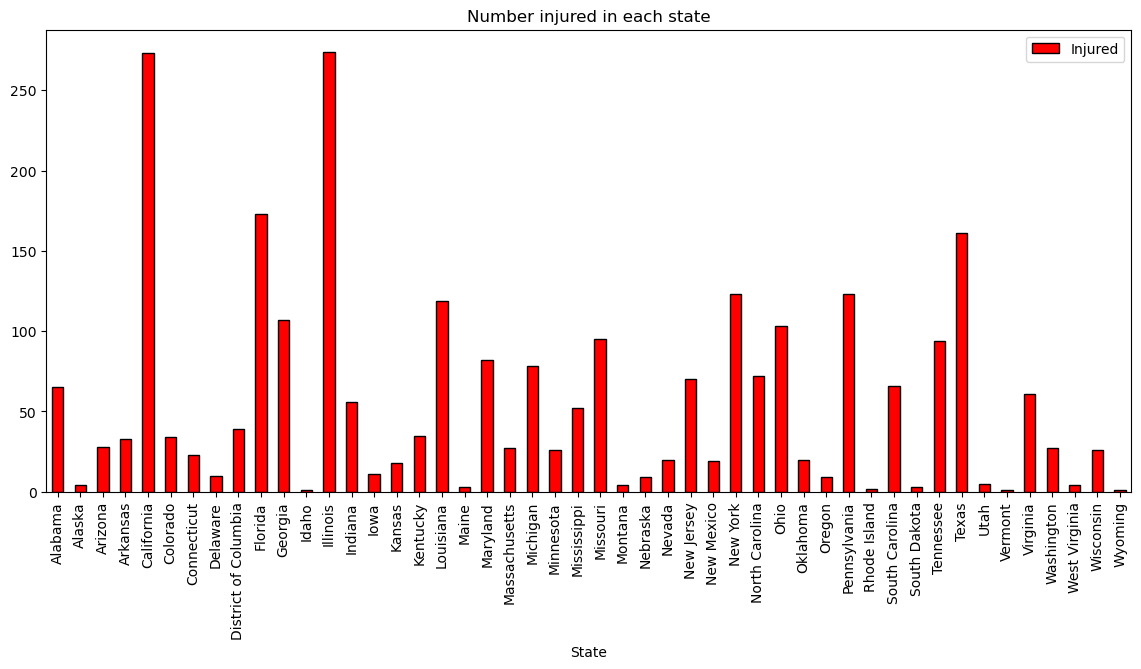

In [ ]:

injured_df = df_cleaned.groupby('State',as_index=False).agg({'Injured': 'count'})
injured_df.plot(kind = 'bar',figsize=(14,6), x = 'State', y = 'Injured', rot = 90, title = 'Number injured in each state', facecolor = 'red', edgecolor = 'black')

### <b>Task 3</b>

#### Task 3.1
##### Our data is now being cleaned through chains but not within a method

In [ ]:
df = (
        pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
        .drop(['incident_id','address'], axis=1)
        .dropna(axis = 0)
        .rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})     
    ) 
df1 = (
        df
        .assign(Total= df.Killed+ df.Injured)
        [(df.Killed < 15) & (df.Injured < 20)]
        .assign(Month=lambda x : x.incident_date.str.split().str[0])
        .assign(Year=lambda x : x.incident_date.str.split().str[2])
        
    )  
df2 = (
        df1
        .drop(['incident_date'], axis=1)
        .astype({'Year': 'int64'})
        .loc[lambda x: x['Year'] < 2021]
        [['Year','Month','State','City/County','Killed','Injured','Total']]
    )
df = df2
print(df.head())

     Year     Month          State   City/County  Killed  Injured  Total
232  2020  December        Indiana  Indianapolis       1        3      4
233  2020  December         Oregon  Happy Valley       0        4      4
234  2020  December       Illinois      Rockford       3        3      6
235  2020  December        Florida         Tampa       2        2      4
236  2020  December  Massachusetts          Lynn       1        5      6


#### Task 3.2
##### Our data is now being cleaned with a method chain but within the same file

In [ ]:
def load_and_process(csvPath):
    df = (
         pd.read_csv(csvPath)
        .drop(['incident_id','address'], axis=1)
        .dropna(axis = 0)
        .rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})     
    ) 
    df1 = (
        df
        .assign(Total= df.Killed+ df.Injured)
        [(df.Killed < 15) & (df.Injured < 20)]
        .assign(Month=lambda x : x.incident_date.str.split().str[0])
        .assign(Year=lambda x : x.incident_date.str.split().str[2])
        
    )  
    df2 = (
        df1
        .drop(['incident_date'], axis=1)
        .astype({'Year': 'int64'})
        .loc[lambda x: x['Year'] < 2021]
        [['Year','Month','State','City/County','Killed','Injured','Total']]
    )
    return df2
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
print(df.head())

     Year     Month          State   City/County  Killed  Injured  Total
232  2020  December        Indiana  Indianapolis       1        3      4
233  2020  December         Oregon  Happy Valley       0        4      4
234  2020  December       Illinois      Rockford       3        3      6
235  2020  December        Florida         Tampa       2        2      4
236  2020  December  Massachusetts          Lynn       1        5      6


#### Task 3.3
##### Read our method chain from a seperate file

In [ ]:
from project_functions1 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
print(df.head())

     Year     Month          State   City/County  Killed  Injured  Total
232  2020  December        Indiana  Indianapolis       1        3      4
233  2020  December         Oregon  Happy Valley       0        4      4
234  2020  December       Illinois      Rockford       3        3      6
235  2020  December        Florida         Tampa       2        2      4
236  2020  December  Massachusetts          Lynn       1        5      6


### <b>Task 4</b>
#### <b>What is considered a mass shooting?</b>

The question I would most like to answer through an analysis of our data is what is required for it to be considered a mass shooting. Without a proper definition, it is difficult to tell. It is now generally accepted that a mass shooting has a minimum of three or four victims. When looking through our data of total injured or killed in each incident, we can tell that on average 4.97 people were either injured or killed in each shooting incident. This means that a majority of the shootings that occurred in the U.S over the past 7 years can be considered mass shootings. It is worth noting that this was the average even after I filtered out extreme incidents of more than 15 killed or 20 injured, so if we were analyzing every incident that occurred, the average would be even higher.
####
#### <b> Has the number of shootings been increasing?</b>
After analyzing our data by month and year, I can confidently say the frequency of shootings has steadily risen over the past seven years. 2020 alone had over 600 separate shooting incidents which is more than double the amount of shootings that occurred in 2014. 
#### <b> The graph below shows the number of shootings per year from 2014-2020</b> 

![graph_death/year](../images/per_year.png)

####
#### <b>Which month of the year is the worst for shootings?</b>
After analyzing our data separated into months, we can see that it is mainly the summer months where shootings occur the most often. June appears to be the worst month for the number of shootings with July and August as a close second and third. This correlates with what was initially expected because the more people are outside for longer periods of time and interacting more with others, the greater likelihood a conflict may break out where people can be shot or caught in the crossfire of other shootings.
#### <b> The graph below shows the number of shootings per month between 2014 and 2020</b>
![](../images/per_month.png)

#### 
#### <b> How often do shootings occur in the U.S?</b>
Over our 7 years of data analyzed an average of 1.08 shootings occurred each day. This quite a concerning metric as other similarly developed countries such as Canada, Australia or the U.K have no where near the amount or frequency of shootings as the U.S. does. It is important to note that 77% of homicides that occur in the U.S. are gun related deaths, this compared to Canada at 37% and Australia at only 13%. <i>BBC 2020</i> [Link here](https://www.bbc.com/news/world-us-canada-41488081).